In [1]:
import pandas as pd
import csv
import numpy as np
import time

from Helper.Preprocessing import *
from Helper.Model import *
from Helper.GeneticAlgorithm import GeneticAlgorithm
from Helper.PSO import PSO
from Helper.FileManager import FileManager

In [2]:
dfx = pd.read_csv("../ufjf_dataset.csv")
dfx['time1'] = pd.to_datetime(dfx['time1'])
dfx.index = dfx['time1']
dfx['radio_id'] = dfx['radio_id'].str.lower()
dfx.head(10)

,time1,timet,client_id,radio_id
time1,,,,
2019-05-31 08:48:52,2019-05-31 08:48:52,13.0,7,economia-4andar
2019-05-31 08:48:52,2019-05-31 08:48:52,31.0,20,ru_nutricionistas
2019-05-31 08:48:53,2019-05-31 08:48:53,38.0,29,ap4600-67aef4
2019-05-31 08:48:53,2019-05-31 08:48:53,17.0,12,reitoria-centralatendimento
2019-05-31 08:48:54,2019-05-31 08:48:54,10.0,5,ccs-2andarfundos
2019-05-31 08:48:55,2019-05-31 08:48:55,9.0,6,engenharia-labspot
2019-05-31 08:48:56,2019-05-31 08:48:56,1.0,1,predioitamarfranco3andarsala5306
2019-05-31 08:48:56,2019-05-31 08:48:56,2.0,2,sala4157ladocantinaengenharia
2019-05-31 08:48:56,2019-05-31 08:48:56,2.0,3,iad-1andar


In [3]:
dfxx = dfx[dfx['radio_id'].str.contains('ru')]
l_ru = list(dfxx['radio_id'].unique())
l_ru.remove('deptconstrucaocivilsala4107')
l_ru

df = dfx[dfx['radio_id'].str.contains('|'.join(l_ru))]

X, Y = Preprocessing(df).get_data()

Pre-processing...


# Common Variables

In [8]:
generation = 15
population_size = 15
P = 11
Q = 3

# MLP Hyperparameters

In [5]:
n_MAX = 200
n_MIN = 20
learning_rate_MAX = 0.0009
learning_rate_MIN = 0.00001
maxiter = 2000

boundaries = np.zeros([2,2])
boundaries[0,0] = n_MIN
boundaries[1,0] = n_MAX
boundaries[0,1] = learning_rate_MIN
boundaries[1,1] = learning_rate_MAX

boundaries_type = [None] * 2
boundaries_type[0] = True # Integer
boundaries_type[1] = False # Float

print(boundaries[0,:])

[2.e+01 1.e-05]


# Genetic Algorithm - MLP

In [9]:
ga = GeneticAlgorithm(population_size, boundaries, boundaries_type)
fm = FileManager()
fm.create_file("ga_test")
index = 0
while index <= generation:
    index += 1
    print("\n--- Generation {} ---".format(index))
    ga.generate()  
    population = ga.get_population()
    for i in population:
        start_time = time.time()
        parameters = i.get_parameters()
        
        model = Model(X, Y, model_type = 'MLP', n_neurons = parameters[0], learning_rate = parameters[1])
        
        fitness_r2 = model.fit_predict_evaluate(n_splits = 3, n_repeats = 5, metric = 'adjusted_r2')
        
        ga.evaluate(i, fitness_r2)
        ga_time = time.time() - start_time
        fm.write2file(parameters, P, Q, fitness_r2, ga_time)
    
    ga.print_population()
    ga.print_best_solution()
fm.close_file()


--- Generation 1 ---
Individual 1: Parameters:(77,0.00011096326743845944) Fitness: 0.9358796468926848
Individual 2: Parameters:(131,0.00024002376486089181) Fitness: 0.9377887364520671
Individual 3: Parameters:(77,0.000736627183388028) Fitness: 0.9379197851361224
Individual 4: Parameters:(136,0.00032398501690867584) Fitness: 0.9388514009213428
Individual 5: Parameters:(24,0.00032398501690867584) Fitness: 0.9338122664308014
Individual 6: Parameters:(136,0.0005061512078200029) Fitness: 0.9383324874427291
Individual 7: Parameters:(146,0.0002999301038992031) Fitness: 0.9383146991883293
Individual 8: Parameters:(61,0.00011096326743845944) Fitness: 0.9352478948786421
Individual 9: Parameters:(24,0.00044263118933875065) Fitness: 0.9344975729020353
Individual 10: Parameters:(158,0.00011096326743845944) Fitness: 0.9374680607050284
Individual 11: Parameters:(70,0.00011096326743845944) Fitness: 0.9357483764244006
Individual 12: Parameters:(185,0.0005061512078200029) Fitness: 0.9385921349409292
In

Individual 1: Parameters:(146,0.0001270251033154305) Fitness: 0.9376901258433391
Individual 2: Parameters:(131,0.0006485285973482211) Fitness: 0.9384906482380452
Individual 3: Parameters:(69,0.0007368743153709391) Fitness: 0.9370286972641687
Individual 4: Parameters:(182,0.00035318687861163615) Fitness: 0.9388162913647965
Individual 5: Parameters:(103,0.0006485285973482211) Fitness: 0.9379408632640415
Individual 6: Parameters:(146,0.0006485285973482211) Fitness: 0.9386847399014611
Individual 7: Parameters:(69,0.0008375283650105153) Fitness: 0.9377184799168767
Individual 8: Parameters:(146,6.974193034223704e-05) Fitness: 0.9363353033466307
Individual 9: Parameters:(103,0.0001670901207990919) Fitness: 0.9375607194890585
Individual 10: Parameters:(146,0.00011146235336531139) Fitness: 0.9374163940736494
Individual 11: Parameters:(103,0.000553844346528913) Fitness: 0.9375838415645815
Individual 12: Parameters:(77,0.0006485285973482211) Fitness: 0.9381312433960788
Individual 13: Parameters:(

Individual 1: Parameters:(40,0.0007997919383900209) Fitness: 0.935372735170476
Individual 2: Parameters:(69,0.0006485285973482211) Fitness: 0.9370918655648189
Individual 3: Parameters:(84,9.326225815213358e-05) Fitness: 0.9358855337580484
Individual 4: Parameters:(69,0.0006485285973482211) Fitness: 0.9365515527805335
Individual 5: Parameters:(131,0.0006485285973482211) Fitness: 0.9380072154620779
Individual 6: Parameters:(131,0.0006485285973482211) Fitness: 0.9383510638891183
Individual 7: Parameters:(148,0.00011146235336531139) Fitness: 0.9371870022407914
Individual 8: Parameters:(131,0.0006485285973482211) Fitness: 0.938021250753599
Individual 9: Parameters:(69,9.326225815213358e-05) Fitness: 0.9352847735537619
Individual 10: Parameters:(69,0.00011146235336531139) Fitness: 0.9358749560544471
Individual 11: Parameters:(131,0.0008968748024149232) Fitness: 0.9388887377446741
Individual 12: Parameters:(69,0.0006485285973482211) Fitness: 0.9373351096983664
Individual 13: Parameters:(131,0

# PSO - MLP

In [10]:
# Initializing the variables and the population
pso = PSO(population_size, boundaries, boundaries_type)
fm = FileManager()
pop = pso.get_population()
fm.create_file("pso_test")

print('\nInitializing the population...')
for p in pop:
    start_time = time.time()
    param = p.get_position()

    model = Model(X, Y, model_type = 'MLP', n_neurons = int(param[0]), learning_rate = param[1])
    fitness_r2 = model.fit_predict_evaluate(n_splits = 3, n_repeats = 5, metric = 'adjusted_r2')

    pso.insert_particle_fitness(p, fitness_r2)
    pso_time = time.time() - start_time
    fm.write2file(param, P, Q, fitness_r2, pso_time)

pso.print_global_best_particle()

iteration = 0
print('\nRunning PSO Loop...')
while(iteration <= generation):
    iteration += 1
    print('\nRunning... : {} of {}.'.format(iteration, generation))
    for p in pop:
        start_time = time.time()
        print("Particle {}.".format(p.get_index()))
        pso.calculate_position_velocity(p)
        param = p.get_position()
        print(param)

        model = Model(X, Y, model_type = 'MLP', n_neurons = int(param[0]), learning_rate = param[1])
        fitness_r2 = model.fit_predict_evaluate(n_splits = 3, n_repeats = 5, metric = 'adjusted_r2')
        
        pso.insert_particle_fitness(p, fitness_r2)
        pso_time = time.time() - start_time
        fm.write2file(param, P, Q, fitness_r2, pso_time)
        
    pso.print_global_best_particle()
    print("GBest_swap = {}".format(pso.get_best_particle_swap()))
    
fm.close_file()


Initializing the population...
-----------------------------------------------
Best Particle: 4
Best Position:[173, 0.0006439293836156117]
Best Fitness: 0.9392382450816518
-----------------------------------------------

Running PSO Loop...

Running... : 1 of 15.
Particle 0.
[184, 0.0007745892985198926]
Particle 1.
[125, 0.00046497623404155266]
Particle 2.
[168, 0.000675513004271041]
Particle 3.
[168, 0.000209508658202629]
Particle 4.
[179, 0.0005910219656322117]
Particle 5.
[148, 0.0004494420478350982]
Particle 6.
[127, 0.0002561760849363521]
Particle 7.
[177, 0.0006523304458254985]
Particle 8.
[125, 0.0007160440162124862]
Particle 9.
[161, 0.0005075149239107651]
Particle 10.
[75, 0.00025288147015014163]
Particle 11.
[102, 0.0006973342767458323]
Particle 12.
[168, 0.00033491411557929604]
Particle 13.
[77, 0.0007587309440368225]
Particle 14.
[57, 0.00011826231557463102]
-----------------------------------------------
Best Particle: 4
Best Position:[173, 0.0006439293836156117]
Best Fit

Particle 8.
[188, 0.0005253114545723631]
Particle 9.
[172, 0.0005339436567966423]
Particle 10.
[193, 0.0005960135316792744]
Particle 11.
[174, 0.0005427390758678387]
Particle 12.
[195, 0.000588058488333951]
Particle 13.
[160, 0.0005496479500936706]
Particle 14.
[172, 0.0005315893453045315]
-----------------------------------------------
Best Particle: 5
Best Position:[186, 0.0005372057466428271]
Best Fitness: 0.9394785127505844
-----------------------------------------------
GBest_swap = 4

Running... : 11 of 15.
Particle 0.
[177, 0.0006371107555544485]
Particle 1.
[174, 0.0005426937868066475]
Particle 2.
[182, 0.0005444564307625683]
Particle 3.
[187, 0.000572162979429378]
Particle 4.
[177, 0.0006024835726757337]
Particle 5.
[184, 0.0005205361337954707]
Particle 6.
[180, 0.0005192392092534657]
Particle 7.
[186, 0.0005176235091627339]
Particle 8.
[190, 0.0006143114545723631]
Particle 9.
[173, 0.0005474038206929943]
Particle 10.
[195, 0.0005516555341791865]
Particle 11.
[182, 0.000539761

# DT Hyperparameters

In [18]:
max_depth_MAX = 200
max_depth_MIN = 10
min_samples_split_MAX = 22
min_samples_split_MIN = 2

boundaries = np.zeros([2,2])
boundaries[0,0] = max_depth_MIN
boundaries[1,0] = max_depth_MAX
boundaries[0,1] = min_samples_split_MIN
boundaries[1,1] = min_samples_split_MAX

boundaries_type = [None] * 2
boundaries_type[0] = True # Integer
boundaries_type[1] = True # Integer

print(boundaries[0,:])

[10.  2.]


# Genetic Algorithm - DT

In [19]:
ga = GeneticAlgorithm(population_size, boundaries, boundaries_type)
fm = FileManager()
fm.create_file("ga_test_dt")
index = 0
while index <= generation:
    index += 1
    print("\n--- Generation {} ---".format(index))
    ga.generate()  
    population = ga.get_population()
    for i in population:
        start_time = time.time()
        parameters = i.get_parameters()
        
        model = Model(X, Y, model_type = 'DT', max_depth = parameters[0], min_samples_split = parameters[1])
        
        fitness_r2 = model.fit_predict_evaluate(n_splits = 3, n_repeats = 5, metric = 'adjusted_r2')
        
        ga.evaluate(i, fitness_r2)
        ga_time = time.time() - start_time
        fm.write2file(parameters, P, Q, fitness_r2, ga_time)
    
    ga.print_population()
    ga.print_best_solution()
fm.close_file()


--- Generation 1 ---
Individual 1: Parameters:(144,13) Fitness: 0.8990238349238793
Individual 2: Parameters:(62,12) Fitness: 0.8986849105735766
Individual 3: Parameters:(122,13) Fitness: 0.9011062540107629
Individual 4: Parameters:(119,21) Fitness: 0.9095825184746772
Individual 5: Parameters:(39,10) Fitness: 0.8951566464799915
Individual 6: Parameters:(18,19) Fitness: 0.9069136325504039
Individual 7: Parameters:(121,13) Fitness: 0.9017861488702413
Individual 8: Parameters:(29,10) Fitness: 0.8938320995366223
Individual 9: Parameters:(173,10) Fitness: 0.8944735145940907
Individual 10: Parameters:(60,19) Fitness: 0.9056104840107982
Individual 11: Parameters:(144,10) Fitness: 0.8952675748074284
Individual 12: Parameters:(138,13) Fitness: 0.8990976585113029
Individual 13: Parameters:(62,21) Fitness: 0.9087714115226081
Individual 14: Parameters:(106,12) Fitness: 0.898559128501065
Individual 15: Parameters:(119,19) Fitness: 0.9057711366043273
Best Individual: Parameters:(119, 21) Fitness: 0.

Individual 1: Parameters:(106,2) Fitness: 0.8812934850239986
Individual 2: Parameters:(70,2) Fitness: 0.882105195218542
Individual 3: Parameters:(41,2) Fitness: 0.8795254066564904
Individual 4: Parameters:(106,5) Fitness: 0.8868626901572
Individual 5: Parameters:(106,13) Fitness: 0.9004427489108203
Individual 6: Parameters:(106,2) Fitness: 0.8795927180087371
Individual 7: Parameters:(121,2) Fitness: 0.8823285273337759
Individual 8: Parameters:(106,13) Fitness: 0.9010582326322711
Individual 9: Parameters:(106,19) Fitness: 0.905544276270714
Individual 10: Parameters:(106,2) Fitness: 0.8814826592215614
Individual 11: Parameters:(33,2) Fitness: 0.8818892649230823
Individual 12: Parameters:(106,21) Fitness: 0.9077059491248333
Individual 13: Parameters:(41,2) Fitness: 0.8799309832428388
Individual 14: Parameters:(106,19) Fitness: 0.9058393973673506
Individual 15: Parameters:(121,2) Fitness: 0.8842532979656416
Best Individual: Parameters:(173, 21) Fitness: 0.9103291898961914

--- Generation 1

# PSO - DT

In [20]:
# Initializing the variables and the population
pso = PSO(population_size, boundaries, boundaries_type)
fm = FileManager()
pop = pso.get_population()
fm.create_file("pso_test_dt")

print('\nInitializing the population...')
for p in pop:
    start_time = time.time()
    param = p.get_position()

    model = Model(X, Y, model_type = 'DT', max_depth = int(param[0]), min_samples_split = int(param[1]))
    fitness_r2 = model.fit_predict_evaluate(n_splits = 3, n_repeats = 5, metric = 'adjusted_r2')

    pso.insert_particle_fitness(p, fitness_r2)
    pso_time = time.time() - start_time
    fm.write2file(param, P, Q, fitness_r2, pso_time)

pso.print_global_best_particle()

iteration = 0
print('\nRunning PSO Loop...')
while(iteration <= generation):
    iteration += 1
    print('\nRunning... : {} of {}.'.format(iteration, generation))
    for p in pop:
        start_time = time.time()
        print("Particle {}.".format(p.get_index()))
        pso.calculate_position_velocity(p)
        param = p.get_position()
        print(param)

        model = Model(X, Y, model_type = 'DT', max_depth = int(param[0]), min_samples_split = int(param[1]))
        fitness_r2 = model.fit_predict_evaluate(n_splits = 3, n_repeats = 5, metric = 'adjusted_r2')
        
        pso.insert_particle_fitness(p, fitness_r2)
        pso_time = time.time() - start_time
        fm.write2file(param, P, Q, fitness_r2, pso_time)
        
    pso.print_global_best_particle()
    print("GBest_swap = {}".format(pso.get_best_particle_swap()))
    
fm.close_file()


Initializing the population...
-----------------------------------------------
Best Particle: 1
Best Position:[81, 20]
Best Fitness: 0.907133784243932
-----------------------------------------------

Running PSO Loop...

Running... : 1 of 15.
Particle 0.
[102, 14]
Particle 1.
[69, 20]
Particle 2.
[143, 4]
Particle 3.
[43, 14]
Particle 4.
[116, 4]
Particle 5.
[86, 11]
Particle 6.
[136, 17]
Particle 7.
[156, 6]
Particle 8.
[135, 6]
Particle 9.
[146, 4]
Particle 10.
[163, 6]
Particle 11.
[74, 7]
Particle 12.
[63, 15]
Particle 13.
[35, 17]
Particle 14.
[95, 16]
-----------------------------------------------
Best Particle: 1
Best Position:[81, 20]
Best Fitness: 0.907133784243932
-----------------------------------------------
GBest_swap = 2

Running... : 2 of 15.
Particle 0.
[85, 16]
Particle 1.
[68, 20]
Particle 2.
[124, 6]
Particle 3.
[59, 16]
Particle 4.
[98, 6]
Particle 5.
[75, 13]
Particle 6.
[117, 19]
Particle 7.
[137, 8]
Particle 8.
[116, 8]
Particle 9.
[127, 6]
Particle 10.
[144, 

Particle 1.
[90, 22]
Particle 2.
[105, 22]
Particle 3.
[86, 21]
Particle 4.
[82, 22]
Particle 5.
[103, 22]
Particle 6.
[74, 22]
Particle 7.
[87, 22]
Particle 8.
[88, 21]
Particle 9.
[99, 21]
Particle 10.
[83, 22]
Particle 11.
[69, 22]
Particle 12.
[80, 22]
Particle 13.
[80, 22]
Particle 14.
[81, 22]
-----------------------------------------------
Best Particle: 6
Best Position:[74, 22]
Best Fitness: 0.9112729398797978
-----------------------------------------------
GBest_swap = 7


In [11]:
ga_mlp = ga.get_list_best()
pso_mlp = pso.get_list_best()

In [12]:
import matplotlib.pyplot as plt

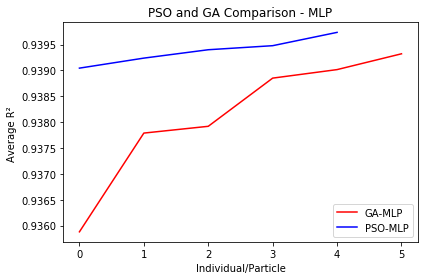

In [17]:
plt.plot(ga_mlp, color = 'r', label = 'GA-MLP')
plt.plot(pso_mlp, color = 'b', label = 'PSO-MLP')
plt.xlabel("Individual/Particle")
plt.ylabel("Average R² ")
plt.title("PSO and GA Comparison - MLP")
plt.legend()
plt.tight_layout()
plt.savefig('gapsomlp.png', dpi = 200)
plt.show()

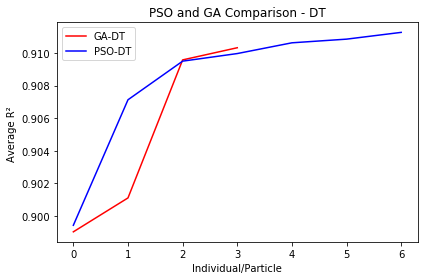

In [21]:
ga_dt = ga.get_list_best()
pso_dt = pso.get_list_best()
plt.plot(ga_dt, color = 'r', label = 'GA-DT')
plt.plot(pso_dt, color = 'b', label = 'PSO-DT')
plt.xlabel("Individual/Particle")
plt.ylabel("Average R² ")
plt.title("PSO and GA Comparison - DT")
plt.legend()
plt.tight_layout()
plt.savefig('gapsodt.png', dpi = 200)
plt.show()